In [ ]:
import torch
from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.5.1+cu101 _CudaDeviceProperties(name='Tesla K80', major=3, minor=7, total_memory=11441MB, multi_processor_count=13)


The network architecture of RetinaNet

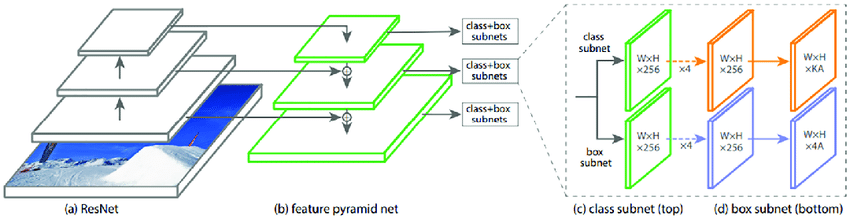

Install Requirements

In [ ]:
%%shell

pip install cython
# Install pycocotools, the version by default in Colab
# has a bug fixed in https://github.com/cocodataset/cocoapi/pull/354
pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'

  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-0uz2_n_w
  Running command git clone -q https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-0uz2_n_w
  Created wheel for pycocotools: filename=pycocotools-2.0-cp36-cp36m-linux_x86_64.whl size=266987 sha256=ec90309c10940991d66c685f0ed67a58ded8ea4bf3c7b11dffc1937dd10e7639
  Stored in directory: /tmp/pip-ephem-wheel-cache-lvdr0qgh/wheels/90/51/41/646daf401c3bc408ff10de34ec76587a9b3ebfac8d21ca5c3a
Successfully built pycocotools
  Found existing installation: pycocotools 2.0.1
    Uninstalling pycocotools-2.0.1:
      Successfully uninstalled pycocotools-2.0.1


Download small custom fruit dataset and load it here

https://drive.google.com/file/d/1O-PK_0LU3MDZLnFs8c_t59uaL7FCBSNC/view?usp=sharing

Else you can add it to your drive and mount drive with google colab notebook

Data is in drive and I mounted drive with this google colab notebook

In [ ]:
!cp /content/drive/My\ Drive/data.zip /content

In [ ]:
!unzip data.zip

Archive:  data.zip
   creating: data/Annotations/
  inflating: data/Annotations/0.xml  
  inflating: data/Annotations/1.xml  
  inflating: data/Annotations/10.xml  
  inflating: data/Annotations/11.xml  
  inflating: data/Annotations/12.xml  
  inflating: data/Annotations/13.xml  
  inflating: data/Annotations/14.xml  
  inflating: data/Annotations/15.xml  
  inflating: data/Annotations/16.xml  
  inflating: data/Annotations/17.xml  
  inflating: data/Annotations/2.xml  
  inflating: data/Annotations/3.xml  
  inflating: data/Annotations/4.xml  
  inflating: data/Annotations/5.xml  
  inflating: data/Annotations/6.xml  
  inflating: data/Annotations/7.xml  
  inflating: data/Annotations/8.xml  
  inflating: data/Annotations/9.xml  
   creating: data/images/
  inflating: data/images/0.jpg       
  inflating: data/images/1.jpg       
  inflating: data/images/10.jpg      
  inflating: data/images/11.jpg      
  inflating: data/images/12.jpg      
  inflating: data/images/13.jpg      
  in

This dataset is in the Pascal VOC format. Convert this dataset into COCO dataset format

In [ ]:
!git clone https://github.com/ganeshkulkarni98/PascalVOC2COCO
%cd PascalVOC2COCO
!python voc2coco.py --annotation_folder_path /content/data/Annotations --json_file_path /content/data/output.json --image_folder_path /content/data/images
%cd ../

Cloning into 'PascalVOC2COCO'...
remote: Enumerating objects: 85, done.
remote: Counting objects: 100% (85/85), done.
remote: Compressing objects: 100% (83/83), done.
remote: Total 85 (delta 39), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (85/85), done.
/content/PascalVOC2COCO
Number of xml files: 18
Annoations of each image is present
Success: /content/data/output.json
/content


Clone repository of RetinaNet Implementation

In [ ]:
!git clone https://github.com/ganeshkulkarni98/retinanet

Cloning into 'retinanet'...
remote: Enumerating objects: 78, done.
remote: Counting objects: 100% (78/78), done.
remote: Compressing objects: 100% (77/77), done.
remote: Total 78 (delta 40), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (78/78), done.


In [ ]:
%cd retinanet

/content/retinanet


ResNet (Backbone) pretrained weights (Trained on ImageNet Dataset)

Resnet (Backbone) pretrained weight (Trained on ImageNet Dataset)

For custom dataset, we can have pretrained weights of backbone. We can not use RetinaNet model pretrained weights because output classes may differ in custom dataset. It will take care when we load pretrained backbone but could not possible during pretrained model on different dataset.

In [ ]:
# !wget https://download.pytorch.org/models/resnet18-5c106cde.pth
# !wget https://download.pytorch.org/models/resnet34-333f7ec4.pth
# !wget https://download.pytorch.org/models/resnet50-19c8e357.pth
# !wget https://download.pytorch.org/models/resnet101-5d3b4d8f.pth
# !wget https://download.pytorch.org/models/resnet152-b121ed2d.pth

--2020-06-19 18:47:38--  https://download.pytorch.org/models/resnet18-5c106cde.pth
Resolving download.pytorch.org (download.pytorch.org)... 99.86.33.64, 99.86.33.87, 99.86.33.48, ...
Connecting to download.pytorch.org (download.pytorch.org)|99.86.33.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46827520 (45M) [application/octet-stream]
Saving to: ‘resnet18-5c106cde.pth’

resnet18-5c106cde.p 100%[===================>]  44.66M   224MB/s    in 0.2s    

2020-06-19 18:47:38 (224 MB/s) - ‘resnet18-5c106cde.pth’ saved [46827520/46827520]

--2020-06-19 18:47:41--  https://download.pytorch.org/models/resnet34-333f7ec4.pth
Resolving download.pytorch.org (download.pytorch.org)... 99.86.33.64, 99.86.33.87, 99.86.33.48, ...
Connecting to download.pytorch.org (download.pytorch.org)|99.86.33.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87306240 (83M) [application/octet-stream]
Saving to: ‘resnet34-333f7ec4.pth’

resnet34-333f7ec4.p 100%[

In [ ]:
!wget https://download.pytorch.org/models/resnet152-b121ed2d.pth

--2020-06-27 18:20:17--  https://download.pytorch.org/models/resnet152-b121ed2d.pth
Resolving download.pytorch.org (download.pytorch.org)... 13.224.113.53, 13.224.113.100, 13.224.113.84, ...
Connecting to download.pytorch.org (download.pytorch.org)|13.224.113.53|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 241530880 (230M) [application/octet-stream]
Saving to: ‘resnet152-b121ed2d.pth’

resnet152-b121ed2d. 100%[===================>] 230.34M  50.8MB/s    in 5.2s    

2020-06-27 18:20:23 (44.0 MB/s) - ‘resnet152-b121ed2d.pth’ saved [241530880/241530880]



RetinaNet model pretrained weight (Trained on COCO dataset) : https://drive.google.com/file/d/1-9UHb7cDcgiPdjrbhG93ooGHBvFYCu1F/view?usp=sharing

In [ ]:
!cp /content/drive/My\ Drive/retinanet50_pretrained.pth /content/retinanet/retinanet50_pretrained.pth

# **Run Train function**

Open retinanet folder

1) open train.py file and go to bottom of the code. Chnage input values accordingly


    # Hyperparameters
    train_batch_size = 2
    val_batch_size = 2
    num_workers = 2
    lr=1e-5
    patience=3
    verbose=True
    maxlen=500
    threshold=0.001

    model_name = 'retinanet'

    epochs = 10

    # Load train and validation dataset 
    # Load train image folder and corresponding coco json file to train dataset
    # Load validation image folder and corresponding json file to validation dataset

    train_json_file = '/content/data/output.json' 
    images_folder = '/content/data/images'
    val_json_file = '/content/data/output.json'


In [ ]:
!python train.py

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
CUDA available: True
model initialized..
Number of training images: 18 Number of validation images: 18
Training dataset
Epoch: 0 | Iteration: 0 | Classification loss: 1.12913 | Regression loss: 1.07888 | Running loss: 2.20801
Epoch: 0 | Iteration: 1 | Classification loss: 1.11724 | Regression loss: 1.03596 | Running loss: 2.18060
Epoch: 0 | Iteration: 2 | Classification loss: 1.09863 | Regression loss: 1.02504 | Running loss: 2.16163
Epoch: 0 | Iteration: 3 | Classification loss: 1.06654 | Regression loss: 1.00630 | Running loss: 2.13943
Epoch: 0 | Iteration: 4 | Classification loss: 1.01330 | Regression loss: 0.98321 | Running loss: 2.11084
Epoch: 0 | Iteration: 5 | Classification loss: 0.95673 | Regression loss: 0.93630 | Running loss: 2.07454
Epoch: 0 | Iteration: 6 | Classification loss: 0.83852 | Regression loss: 1.00

# **Run Test function**

Open retinanet folder

1) open test.py file and go to bottom of the code. change input values accordingly

1.   val_batch_size = 2
2.   num_Workers = 2
3. threshold=0.001

Case 1

    weight_file_path = '/content/retinanet/resnet152-b121ed2d.pth'
    
    test_json_file = '/content/data/output.json'

    images_folder = '/content/data/images'

In [ ]:
!python test.py

CUDA available: True
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
model initialized..
results are empty


Case 2

    weight_file_path = '/content/retinanet/CP_epoch10.pth'
    
    test_json_file = '/content/data/output.json'

    images_folder = '/content/data/images'Run detection function

In [ ]:
!python test.py

CUDA available: True
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
model initialized..
results are empty


Results are empty means we did not get good result on this training. so it cross threshold value of 0.001.

We may need to train it for large epochs in order to get good results. Also We need large dataset for train it.

# **Run Detect function**

Open retinanet folder

1) open detect.py file and go to bottom of the code. change input values accordingly

Select weight file

    weight_file_path = '/content/ssd/best_model.pth'

For label map only we use json folder file

    test_json_file = '/content/data/output.json'

Give input of image folder 

    images_folder = '/content/data/images'

In [ ]:
!python detect.py

CUDA available: True
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
model initialized..
Elapsed time: 0.7493679523468018
Elapsed time: 0.7016358375549316
Elapsed time: 0.7067384719848633
Elapsed time: 0.7000226974487305
Elapsed time: 0.7008812427520752
Elapsed time: 0.6976773738861084
Elapsed time: 0.6986114978790283
Elapsed time: 0.7073602676391602
Elapsed time: 0.7003638744354248
[array([[[191, 196, 195],
        [191, 196, 195],
        [201, 206, 205],
        ...,
        [103, 116, 123],
        [103, 116, 123],
        [103, 116, 123]],

       [[200, 205, 204],
        [206, 211, 210],
        [217, 222, 221],
        ...,
        [103, 116, 123],
        [103, 116, 123],
        [103, 116, 123]],

       [[212, 217, 216],
        [218, 223, 222],
        [215, 220, 219],
        ...,
        [103, 116, 123],
        [103, 116, 123],
        [103, 116, 123]],

       ...,

       [[103, 116, 123],
        [103, 116, 123],
        [103, 116, 1